In [46]:
import requests
import re
import matplotlib.pyplot as plt
from skimage import io

token = "85ef1e633bca8fbbfc205de60a3ea7a076e84eaed2171180779b672059d708b7d830932e39831f413327a"

In [7]:
request = requests.get("https://api.vk.com/method/groups.get",
             params={"v":"5.52", "access_token": token})

resp_json = request.json()

In [9]:
resp_json

{'error': {'error_code': 5,
  'error_msg': 'User authorization failed: access_token was given to another ip address.',
  'request_params': [{'key': 'v', 'value': '5.52'},
   {'key': 'method', 'value': 'groups.get'},
   {'key': 'oauth', 'value': '1'}]}}

In [3]:
my_groups = resp_json["response"]["items"]

my_groups_str = ",".join([str(x) for x in my_groups[:500]])

KeyError: 'response'

In [4]:
request = requests.get("https://api.vk.com/method/groups.getById",
                      params={"v":"5.52", "access_token": token, "group_ids": my_groups_str})
groups_info = request.json()

NameError: name 'my_groups_str' is not defined

In [6]:
names = [group_info["name"] for group_info in groups_info["response"]]

KeyError: 'response'

In [ ]:
for name in names:
    if "цска" in name.lower():
        print(name)

In [30]:
import json
import numpy as np

In [112]:
with open("./Data/rfpl_info.json") as f:
    rfpl_data = json.load(f)

In [113]:
matches = rfpl_data['data']['stat_tournament']['currentSeason']['matches']

In [116]:
t_1, t_2 = {}, {}
for match in matches:
    t_1[match["home"]["team"]["name"].lower()] = match["home"]["team"]

In [115]:
matches

[{'id': '000000000001',
  'scheduledAtStamp': 1562950800,
  'attendance': 0,
  'currentMinute': '90',
  'periodScore': [{'number': 1, 'homeScore': 0, 'awayScore': 0},
   {'number': 2, 'homeScore': 1, 'awayScore': 0}],
  'home': {'team': {'id': 'fc_lokomotiv_moscow',
    'name': 'Локомотив',
    'logo': {'main': 'https://statistics-stat-logos.trbna.com/champions_league/2018-19/lokomotiv.png'}}},
  'away': {'team': {'id': 'zenit',
    'name': 'Зенит',
    'logo': {'main': 'https://statistics-stat-logos.trbna.com/europe_league/2018-19/zenit.png'}}},
  'venue': {'id': 'rzd_arena',
   'name': 'РЖД Арена',
   'capacity': 28800,
   'lon': 37.560816,
   'lat': 55.659005},
  'events': [{'SCORE_CHANGE': {'team': 'home',
     'matchTime': 84,
     'goalScorer': {'id': 'gia_grigalava',
      'name': '',
      'position': 'defender',
      'avatar': {'main': 'https://s5o.ru/storage/simple/ru/edt/49/25/39/37/rue8b07868de0.jpeg',
       'resize': 'https://statistics-logo.k8s.trbna.com/image/player/gi

In [117]:
t_1

{'локомотив': {'id': 'fc_lokomotiv_moscow',
  'name': 'Локомотив',
  'colors': [{'first': '#018240', 'second': '#CF1E26'}],
  'logo': {'main': 'https://statistics-stat-logos.trbna.com/champions_league/2018-19/lokomotiv.png'}},
 'арсенал тула': {'id': 'arsenal_tula',
  'name': 'Арсенал Тула',
  'colors': [{'first': '#ca040a', 'second': '#FFD301'}],
  'logo': {'main': 'https://s5o.ru/storage/simple/ru/edt/19/34/88/94/rueeed52fad02.jpeg'}},
 'урал екатеринбург': {'id': 'fc_ural_yekaterinburg',
  'name': 'Урал Екатеринбург',
  'colors': [{'first': '#eb6120', 'second': '#000000'}],
  'logo': {'main': 'https://s5o.ru/storage/simple/ru/edt/11/49/70/31/rue7b0ad0aef4.jpeg'}},
 'спартак': {'id': 'spartak_moscow',
  'name': 'Спартак',
  'colors': [{'first': '#d50000', 'second': '#660000'}],
  'logo': {'main': 'https://s5o.ru/storage/simple/ru/edt/20/36/94/18/rue2997571681.jpeg'}},
 'ростов': {'id': 'fc_rostov',
  'name': 'Ростов',
  'colors': [{'first': '#FBE903', 'second': '#254694'}],
  'logo':

In [120]:
with open("./Data/teams_info.json", "w") as f:
    json.dump(t_1, f)

In [119]:
with open("./teams_info.json") as f:
    json.load(f)

In [35]:
teams = ['арсенал тула', 'ахмат', 'динамо', 'зенит', 'краснодар',
       'крылья советов', 'локомотив', 'оренбург', 'ростов',
       'рубин казань', 'сочи', 'спартак', 'урал екатеринбург', 'уфа',
       'фк тамбов', 'цска']

In [62]:
import functions

In [64]:
import imageio
import cv2
img = imageio.imread("./Data/versus_bkg.png")
back_alpha = img[:, :, 3]
back = img[:, :, :3]

In [68]:
logo_1 = cv2.resize(
    imageio.imread("https://statistics-stat-logos.trbna.com/champions_league/2018-19/lokomotiv.png"),
    (70, 70)
)
logo_2 = cv2.resize(
    imageio.imread("https://statistics-stat-logos.trbna.com/europe_league/2018-19/zenit.png"),
    (70, 70)
)

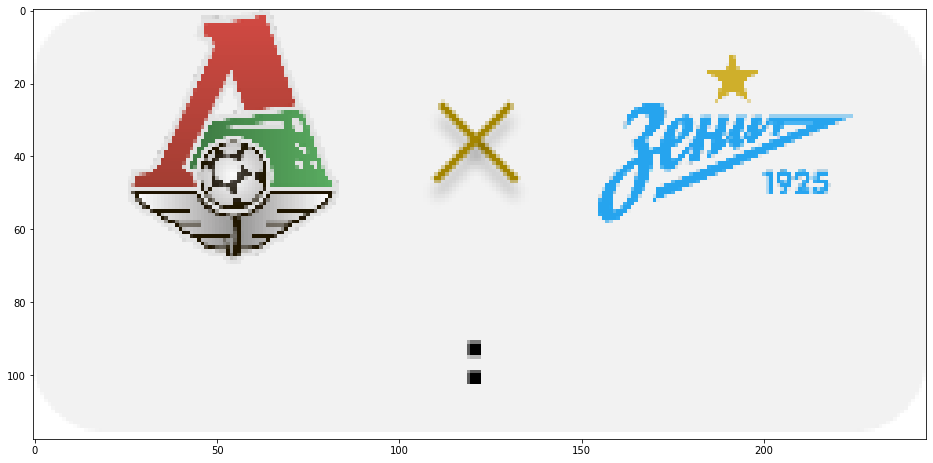

In [75]:
overlay = functions.overlay_image(
    back, logo_1[:, :, :3], logo_1[:, :, 3], (20, 0)
)

overlay = functions.overlay_image(
    overlay, logo_2[:, :, :3], logo_2[:, :, 3], (back.shape[1] - 90, 0)
)

plt.figure(figsize=(16, 9))
plt.imshow(np.dstack((overlay, back_alpha)))

In [79]:
import PIL
from PIL import ImageFont, ImageDraw, Image

In [98]:
fontpath = "./Data/Grey Sans Bold.ttf"     
font = ImageFont.truetype(fontpath, 24)
img_pil = Image.fromarray(overlay)
draw = ImageDraw.Draw(img_pil)
b,g,r,a = 0,0,0,0
draw.text((50, overlay.shape[0] - 35),  "1", font=font, fill=(b,g,r,a))
draw.text((overlay.shape[1] - 65, overlay.shape[0] - 35),  "0", font=font, fill=(b,g,r,a))

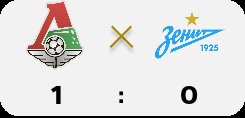

In [99]:
img_pil

In [67]:
imageio.imwrite("./t.jpg", overlay)

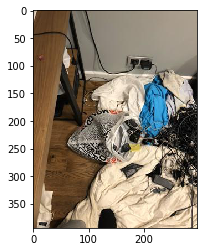

In [51]:
def create_sticker_with_info(match_info):
    img = imageio.imread("./Data/versus_bkg.png")
    back_alpha = img[:, :, 3]
    back = img[:, :, :3]
    logo_1 = cv2.resize(
        imageio.imread(match_info["home_team_logo"]), (70, 70)
    )
    logo_2 = cv2.resize(
        imageio.imread(match_info["away_team_logo"]), (70, 70)
    )
    overlay = functions.overlay_image(
    back, logo_1[:, :, :3], logo_1[:, :, 3], (20, 0)
    )
    overlay = functions.overlay_image(
        overlay, logo_2[:, :, :3], logo_2[:, :, 3], (back.shape[1] - 90, 0)
    )
    
    fontpath = "./Data/Grey Sans Bold.ttf"     
    font = ImageFont.truetype(fontpath, 24)
    img_pil = Image.fromarray(overlay)
    draw = ImageDraw.Draw(img_pil)
    b,g,r,a = 0,0,0,0
    draw.text((50, overlay.shape[0] - 35),  str(match_info["home_score"]), font=font, fill=(b,g,r,a))
    draw.text((overlay.shape[1] - 65, overlay.shape[0] - 35),  str(match_info["away_score"]), font=font, fill=(b,g,r,a))

    png = np.dstack((overlay, back_alpha))
    return png

In [122]:
with open("./Data/rfpl_info.json") as f:
    rfpl_info = json.load(f)

In [127]:
with open("./Data/teams_info.json") as f:
    team_info = json.load(f)

In [124]:
matches = rfpl_data['data']['stat_tournament']['currentSeason']['matches']

In [130]:
matches[0]

{'id': '000000000001',
 'scheduledAtStamp': 1562950800,
 'attendance': 0,
 'currentMinute': '90',
 'periodScore': [{'number': 1, 'homeScore': 0, 'awayScore': 0},
  {'number': 2, 'homeScore': 1, 'awayScore': 0}],
 'home': {'team': {'id': 'fc_lokomotiv_moscow',
   'name': 'Локомотив',
   'logo': {'main': 'https://statistics-stat-logos.trbna.com/champions_league/2018-19/lokomotiv.png'}}},
 'away': {'team': {'id': 'zenit',
   'name': 'Зенит',
   'logo': {'main': 'https://statistics-stat-logos.trbna.com/europe_league/2018-19/zenit.png'}}},
 'venue': {'id': 'rzd_arena',
  'name': 'РЖД Арена',
  'capacity': 28800,
  'lon': 37.560816,
  'lat': 55.659005},
 'events': [{'SCORE_CHANGE': {'team': 'home',
    'matchTime': 84,
    'goalScorer': {'id': 'gia_grigalava',
     'name': '',
     'position': 'defender',
     'avatar': {'main': 'https://s5o.ru/storage/simple/ru/edt/49/25/39/37/rue8b07868de0.jpeg',
      'resize': 'https://statistics-logo.k8s.trbna.com/image/player/gia_grigalava?height=1000&

In [126]:
for match in matches:
    home_team = match["home"]
    away_team = match["away"]
    if home_team["name"].lower() == team:
        if 
    break

{'team': {'id': 'fc_lokomotiv_moscow', 'name': 'Локомотив', 'logo': {'main': 'https://statistics-stat-logos.trbna.com/champions_league/2018-19/lokomotiv.png'}}}
